# Least Squares Methodologies with Python

In this notebook we will go over an example of how to perform Ordinary Least Squares regression (single x + y) as well as Multiple Linear Regression using python. We will also look at generating autocorrelation plots.

As usual we start by importing the data.

In [1]:
import os
import pandas as pd
import numpy as np
data = pd.read_csv(os.getcwd() + os.sep + "regressiondata.csv", index_col = "Unnamed: 0")
print(data)

       x    y          z
0   -5.0 -5.0 -15.126964
1   -4.5 -5.0 -19.835269
2   -4.0 -5.0 -17.584515
3   -3.5 -5.0 -17.218906
4   -3.0 -5.0  -9.403777
..   ...  ...        ...
436  3.0  5.0   3.399930
437  3.5  5.0   7.101061
438  4.0  5.0   8.426533
439  4.5  5.0  13.369264
440  5.0  5.0  11.353852

[441 rows x 3 columns]


## Least Squares Regression with a Single Variable

In our data set we have z as the dependent variable, and x and y as the independent variables. We will first analyze how our model performs using just the x variable to predict z.

Regression models can be built in python using the `from statsmodels.formula.api` library, which contains an `ols` class. The ols class takes as input a DataFrame as well as a string expression indicating which form the regression model should take based on the column names of the dataframe. The general format is "dependent_var_col_name ~ independent_var1_col_name + independent_var2_col_name + ...". This is easier shown with an example.

In [2]:
from statsmodels.formula.api import ols

model = ols("z ~ x", data)
results = model.fit()


In the above example we are building a model to predict z (the dependent variable) based on the values of x (the independent variable). The `ols` command create the ols model object while the `.fit()` command computes the regression model and returns the model results. Let's see what's contained in the results of the model.

In [3]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     3649.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          7.92e-215
Time:                        17:45:26   Log-Likelihood:                -1263.5
No. Observations:                 441   AIC:                             2531.
Df Residuals:                     439   BIC:                             2539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8145      0.203    -23.753      0.0

In this example:
* The intercept term (b0) = -4.8145
* The slope term (b1) = 4.0440 - this implies that on average a unit increase in x results in an increase of z of 4.0440 units
* The z-value for the intercept term is -23.753 - Python calls this the t-value because it comes from the t-distribution but in our notes we called it the z-value
* The 95% confidence interval bounds for the intercept are \[-5.213, -4.416\]. 
* The 95% confidence intervals for the slope term are \[3.912, 4.176\].
* The confidence intervals do not cross zero meaning that zero is not a plausible value for the coefficients. x therefore significantly impacts the value of z.
* The $R^2$ value is 0.893


Let's investigate the results in more detail by checking the ANOVA table. ANOVA related methods canm be found in the `statsmodels.stats.anova` library in the `anova_lm` class.

In [4]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results)
print(anova_results)

             df        sum_sq       mean_sq            F         PR(>F)
x           1.0  66110.897036  66110.897036  3649.019713  7.922701e-215
Residual  439.0   7953.556321     18.117440          NaN            NaN


A key additional piece of information we haven't got yet is the standard error of the model. The `scale` parameter of the model results provides the residual sum of squares. The square root of this value is the standard error.

In [5]:
RSS = results.scale
print("The model standard error is: " + str(np.sqrt(RSS)))

The model standard error is: 4.256458664901206


Lastly, in order to use the model, we want to get the model coefficients without having to hard code the values. They are contained inside the model results.

In [6]:
coefficients = results._results.params
print(coefficients)

[-4.81446239  4.04400339]


There is an alternate way to build linear regression models that are syntactically cleaner. They can be found in the `OLS` class in the `statsmodels.api` library. The drawback to this 'cleaner' method is that it doesn't provide convenient access to the model's ANOVA table. In cases where the ANOVA results aren't needed it may provide a cleaner solution.

By default this version DOES NOT include an intercept term. The intercept term needs to be added manually via the `add_constant` method.

In [7]:
import statsmodels.api as sm

x = sm.add_constant(data['x'])
model = sm.OLS(data['z'], x)
results_other_method = model.fit()
print(results_other_method.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     3649.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          7.92e-215
Time:                        17:45:26   Log-Likelihood:                -1263.5
No. Observations:                 441   AIC:                             2531.
Df Residuals:                     439   BIC:                             2539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8145      0.203    -23.753      0.0

Comparing the results from the second method with the results from the first confirms they are the same. The standard error and the coefficients can be accessed in the same way as the previous method.

## Multiple Linear Regression

Thus far we have built our model for z based solely on x. However, z is actually dependent on both x and y. Let's see how we can build a model using both variables. We talked about the syntax before but it's better shown with an example.

In [8]:
MLR_model = ols("z ~ x + y", data)
MLR_results = MLR_model.fit()

In this case we build a model for z based on both x and y. Arbitrarily many terms can be added to the model in this manner. Let's take a look at the results for this model.

In [9]:
print(MLR_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     3964.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          2.87e-281
Time:                        17:45:26   Log-Likelihood:                -1105.1
No. Observations:                 441   AIC:                             2216.
Df Residuals:                     438   BIC:                             2229.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8145      0.142    -33.979      0.0

The results here look similar to the results above but we have an additional y term. The y term gives the slope coefficient for the y variable as well as the confidence intervals for it. The same commands for the single variable model can also be used on the multiple variable model so I won't repeat examples for them here. 

Some notes on the interpretation of the results:
* The $R^2$ value increased from 0.89 to 0.95 which seems to inficate that y impacts z, but we need to confirm with the CIs
* Looking at the CIs - both x and y are significant factors to predict z as the 95% CIs for both parameters DO NOT cross 0
* Holding y fixed a unit increase in x increases z by on average 4.044 units
* Holding x fixed a unit increase in y DECREASES z by on average -1.0041 units

For reference the function for z in this case is: $z = 4*x -1*y - 5$ plus the addition of some random noise. We can see from the results summary that the true values for all of our parameters fall in the 95% confidence intervals!

The ANOVA table can also be calcualted for the MLR model.

In [10]:
print(anova_lm(MLR_results))

             df        sum_sq       mean_sq            F         PR(>F)
x           1.0  66110.897036  66110.897036  7467.069259  2.721206e-277
y           1.0   4075.652970   4075.652970   460.335351   2.540995e-70
Residual  438.0   3877.903351      8.853661          NaN            NaN


In this case we have two regression sum of square values, one for the x and one for the y. The total $R^2$ value can be calculated by summing up the x and y sum_sq value and dividing by the total sum squared values.

## Autocorrelation

One thing we talked about during the lectures is the concept of autocorrelation. We said that one of the assumptions for our calculation of the model parameter's confidence intervals is that the data should be independent. Often engineering is NOT independent as it is gathered in time. One data point is then likely to be correlated with the value before it. We discussed how autocorrelation can be checked using an autocorrelation plot. `Matplotlib` offers a convenient way to plot the autocorrelation function using the `acorr` method. Let's see an example below to test if our z value is autocorrelated. The number of lags to show on the plot can be specified with the `maxlags` argument. Let's show 6 lag values.

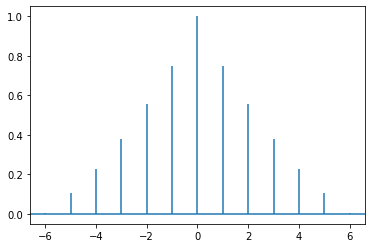

In [11]:
import matplotlib.pyplot as plt
plt.acorr(data['z'], maxlags=6)
plt.show()

By default `matplotlib` shows two sided autocorrelation plot. We're only interested in the right side so let's change our x-limits on the plot to only show the right side. The x limits of the plot can be specified using the `xlim` option. 

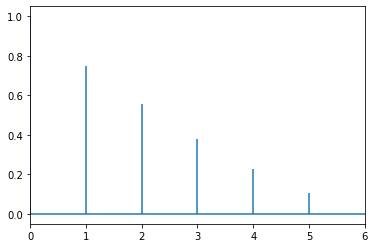

In [12]:
plt.acorr(data['z'], maxlags=5)
plt.xlim([0,6])
plt.show()

In this example the data seems to be mildly autocorrelated. But the results we presented were still good! The CIs we calcualted for our model parameters contained the true values of our parameters. As we discussed in the video lectures, Least Squares regression models are pretty robust to violations of our assumptions. That being said, we should always validate our assumptions and understand "how much" we are violating them by!

## MLR with categorical variables

Let's now look at MLR including categorical variables. In this case we will look at the BirthWeight data set. The outcome of interest is the weight at birth of 32 randomly selected babies. For each birth, along with the weight of the baby, the baby’s gestational age at birth (how many weeks in the mother’s womb prior to birth) and whether the mother smoked tobacco products was also recorded. 

Since the process of fitting the model is the same we'll go through this quickly and simply focus on the interpretation of the Python output.

In [13]:
data = pd.read_csv(os.getcwd() + os.sep + "BirthWeight.csv", delimiter=';')
print(data.head())
model_results = ols("Birthweight_g ~ Gestational_age_weeks + Mother_Smokes", data).fit()
print(model_results.summary())

   Birthweight_g  Gestational_age_weeks Mother_Smokes
0           2940                     38           yes
1           3130                     38            no
2           2420                     36           yes
3           2450                     34            no
4           2760                     39           yes
                            OLS Regression Results                            
Dep. Variable:          Birthweight_g   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.29e-15
Time:                        17:45:27   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2       

The only difference to what we've discussed so far is how Python reports the results for the categorical variable. The table reports the coefficient values for "Mother_Smokes" along with \[T.Yes\]. This implies that mother smokes is given a value of $d=1$ and non-smokers is given a value of $d=0$ (our equation is of the form $Birthweight = b_0 + b_1*Gestational\_age\_weeks + gd_i$).

Our interpretation of the model is as follows:
* Both gestational age and mother smokes significantly impact birthweight because the 95% CI for those coefficients do NOT contain zero
* The coefficient for gestational age is 143.1/week meaning that for each week the baby gestates the average weight at birth increases by 143.1g (holding smoking status fixed)
* The coefficient for mother smokes is -244.5 meaning that mothers who smoke gave birth to babies that are on average 244.5g less than mothers who do not smoke, holding gestational age fixed